In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing

import tensorflow as tf
from tensorflow import keras


In [2]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
train.shape, test.shape

((27100, 17), (18050, 16))

In [3]:
test['y'] = -999

In [4]:
all_df = pd.concat([train, test], axis=0)
all_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other,0
1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown,1
2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure,0
3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure,0
4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18045,49,self-employed,married,tertiary,no,98357,yes,no,cellular,6,jul,101,2,417,0,failure,-999
18046,34,blue-collar,married,secondary,no,29621,yes,no,cellular,12,may,345,1,815,0,unknown,-999
18047,34,admin.,single,secondary,no,94260,yes,no,unknown,16,may,121,2,370,0,unknown,-999


In [5]:
cols_o = all_df.select_dtypes(include='object').columns.tolist()
cols_o

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [6]:
for column in cols_o:
    le = preprocessing.LabelEncoder()
    le.fit(all_df[column])
    all_df[column] = le.transform(all_df[column])

all_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,31,7,1,1,0,12294,1,0,0,21,8,101,3,498,0,1,0
1,29,2,2,2,0,43027,0,0,0,22,1,158,2,702,0,3,1
2,35,4,1,2,0,12252,1,0,0,11,8,351,1,826,0,0,0
3,31,9,1,1,0,99121,1,1,2,16,7,658,2,120,0,0,0
4,48,10,1,0,0,42005,1,0,1,3,0,177,1,273,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18045,49,6,1,2,0,98357,1,0,0,6,4,101,2,417,0,0,-999
18046,34,1,1,1,0,29621,1,0,0,12,7,345,1,815,0,3,-999
18047,34,0,2,1,0,94260,1,0,2,16,7,121,2,370,0,3,-999


In [7]:
X = all_df[all_df['y'] != -999].drop('y', axis=1).values
y = all_df[all_df['y'] != -999]['y'].values
X.shape, y.shape

((27100, 16), (27100,))

In [32]:
batch_size = 5
n_epochs = 10


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [34]:
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=[16]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2, activation='softmax'),
])


In [35]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [36]:
model.fit(X_train, y_train, epochs=n_epochs)

Epoch 1/10
636/636 [==============================] - 2s 3ms/step - loss: 23.6841 - accuracy: 0.8676
Epoch 2/10
636/636 [==============================] - 2s 3ms/step - loss: 0.4092 - accuracy: 0.9157
Epoch 3/10
636/636 [==============================] - 2s 3ms/step - loss: 0.3263 - accuracy: 0.9199
Epoch 4/10
636/636 [==============================] - 2s 3ms/step - loss: 0.2895 - accuracy: 0.9206
Epoch 5/10
636/636 [==============================] - 2s 3ms/step - loss: 0.2850 - accuracy: 0.9208
Epoch 6/10
636/636 [==============================] - 2s 3ms/step - loss: 0.2855 - accuracy: 0.9210
Epoch 7/10
636/636 [==============================] - 2s 3ms/step - loss: 0.2925 - accuracy: 0.9206
Epoch 8/10
636/636 [==============================] - 2s 3ms/step - loss: 0.2987 - accuracy: 0.9208
Epoch 9/10
636/636 [==============================] - 2s 3ms/step - loss: 0.2785 - accuracy: 0.9213
Epoch 10/10
636/636 [==============================] - 2s 3ms/step - loss: 0.3109 - accuracy: 0.921

In [37]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

# 0.9261992573738098

212/212 - 0s - loss: 0.2690 - accuracy: 0.9240

Test accuracy: 0.9239852428436279


In [38]:
y_pred = model.predict(X_test)[:,1]
y_pred

array([0.07849529, 0.07849529, 0.07849529, ..., 0.07849529, 0.07849529,
       0.07849529], dtype=float32)

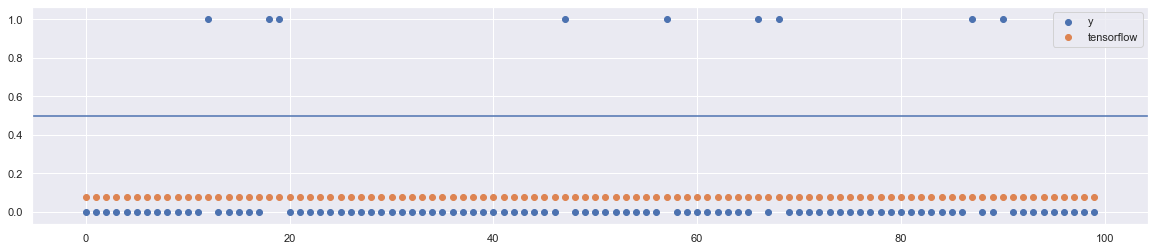

In [39]:
plt.figure(figsize=(20, 4))
plt.scatter(list(range(100)), y_test[:100], alpha=1, label='y')
plt.scatter(list(range(100)), y_pred[:100], alpha=1, label='tensorflow')
plt.axhline(0.5)
plt.legend()